# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

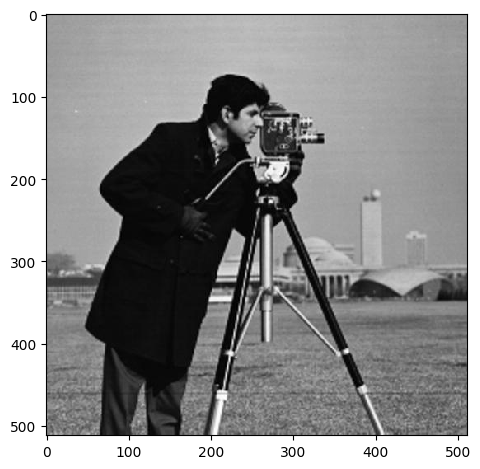

In [1]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

# read the image
camera = imread('camera.jpg')

# display the image
imshow(camera)

# save the image
imsave('camera_copy.jpg', camera)


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

Image shape: (512, 512)
Minimum pixel value: 0
Maximum pixel value: 255
Data type for each pixel: uint8


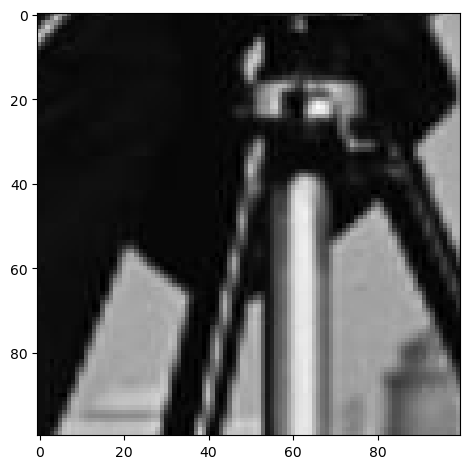

In [9]:
import numpy as np

# 1. What is the shape of the image? (width & height)
print(f"Image shape: {camera.shape}")

# 2. What is the minimum pixel value? What is the maximum pixel value?
print(f"Minimum pixel value: {np.min(camera)}")
print(f"Maximum pixel value: {np.max(camera)}")

# 3. What is the data type for each pixel?
print(f"Data type for each pixel: {camera.dtype}")

# 4. Show only a 100x100 pixels window taken at the center of the image.
center_x, center_y = camera.shape[0] // 2, camera.shape[1] // 2
window_size = 100
window = camera[center_x - window_size//2:center_x + window_size//2, center_y - window_size//2:center_y + window_size//2]
imshow(window)


**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

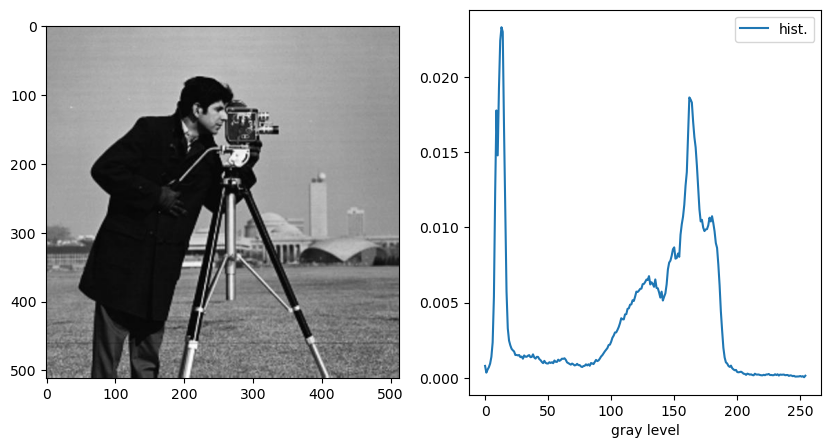

In [25]:
from matplotlib import pyplot as plt

def norm_hist(ima):
    hist,bins = np.histogram(ima.flatten(),range(256))  # histogram is computed on a 1D distribution --> flatten()
    return 1.*hist/np.sum(hist) # normalized histogram

def display_hist(ima):
    plt.figure(figsize=[10,5])
    if ima.ndim == 2:
        nh = norm_hist(ima)
    else:
        nh_r = norm_hist(ima[:,:,0])
        nh_g = norm_hist(ima[:,:,1])
        nh_b = norm_hist(ima[:,:,2])
    # display the results
    plt.subplot(1,2,1)
    plt.imshow(ima,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if ima.ndim == 2:
        plt.plot(nh,label='hist.')
    else:
        plt.plot(nh_r,color='r',label='r')
        plt.plot(nh_g,color='g',label='g')
        plt.plot(nh_b,color='b',label='b')
    plt.legend()
    plt.xlabel('gray level')

display_hist(camera)


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?        170
1. What is the average gray value of the sky ?              20
1. Is there more 'cameraman' pixels than 'sky' pixels ?     sky

Compute and plot the **cumulated histogram**.

In [ ]:

## -- Your code here -- ##


**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [ ]:
    
# -- Your code here -- #


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im):
    a = im[0:-1:2,0:-1:2]
    b = im[0:-1:2,1::2]
    c = im[1::2,0:-1:2]
    d = im[1::2,1::2]
    
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

In [ ]:

# -- Your code here -- #


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

In [ ]:

# -- Your code here -- #


**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

In [ ]:
from skimage.feature import greycomatrix

# -- Your code here -- #


**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

In [ ]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)
plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)
plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

In [ ]:

# -- Your code here -- #


**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


In [ ]:

# -- Your code here -- #
